In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.ensemble import BaggingClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dsaa-6100-titanic-survival-using-decision-trees/train.csv
/kaggle/input/dsaa-6100-titanic-survival-using-decision-trees/test.csv
/kaggle/input/dsaa-6100-titanic-survival-using-decision-trees/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/dsaa-6100-titanic-survival-using-decision-trees/train.csv")
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
#df["FamilySize"].value_counts().sort_index()
#df.groupby("Survived")["FamilySize"].value_counts().sort_index()
#df.head()

In [5]:
df_Selected = df.drop(['PassengerId', 'Name','Ticket', 'Cabin', 'Embarked'], axis=1)
df_Selected

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [6]:
df_Selected.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
df_Selected.groupby("Survived")["Age"].mean().value_counts()

Age
30.626179    1
28.343690    1
Name: count, dtype: int64

In [8]:
df_Selected["Age"] = df_Selected["Age"].fillna(
    df_Selected.groupby("Survived")["Age"].transform("mean")
)

In [9]:
df_Selected.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
df_Selected["Sex"] = df_Selected["Sex"].map({"male": 0, "female": 1})

In [11]:
df_Selected['Age_zscore'] = zscore(df_Selected['Age'])
outliers_zscore = df_Selected[(df_Selected['Age_zscore'] > 3) | (df_Selected['Age_zscore'] < -3)]
print(f"Outliers detected using Z-score in Age: {outliers_zscore.shape[0]} outliers")

Outliers detected using Z-score in Age: 7 outliers


In [12]:
upper_limit = np.percentile(df_Selected['Age'], 97.5)
lower_limit = np.percentile(df_Selected['Age'], 2.5)

In [13]:
df_Selected['Age'] = df_Selected['Age'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

In [14]:
df_Selected['Age_zscore'] = zscore(df_Selected['Age'])
outliers_zscore = df_Selected[(df_Selected['Age_zscore'] > 3) | (df_Selected['Age_zscore'] < -3)]
print(f"Outliers detected using Z-score in Age: {outliers_zscore.shape[0]} outliers")

Outliers detected using Z-score in Age: 0 outliers


In [15]:
df_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Age_zscore  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [16]:
df_Selected.drop("Age_zscore", axis=1, inplace=True)

In [17]:
df_Selected.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.619129,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,12.559998,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,60.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


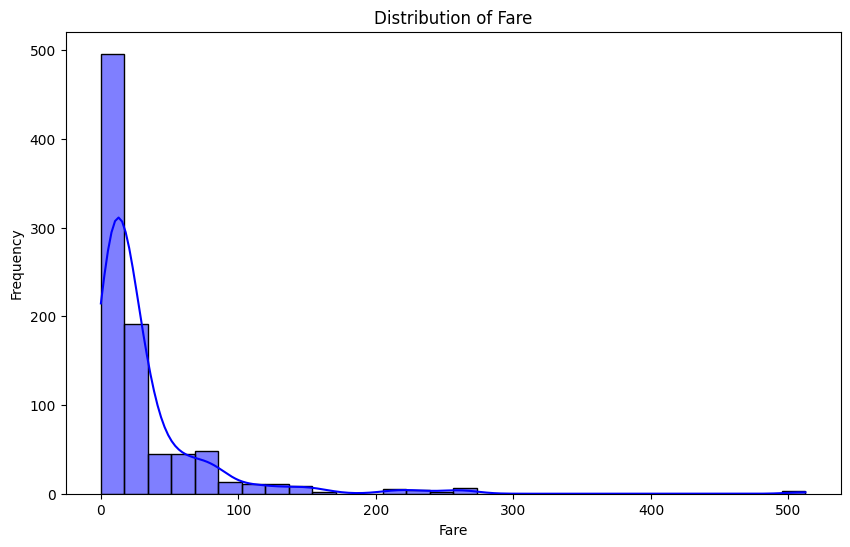

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for 'Fare' column
plt.figure(figsize=(10, 6))
sns.histplot(df_Selected['Fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

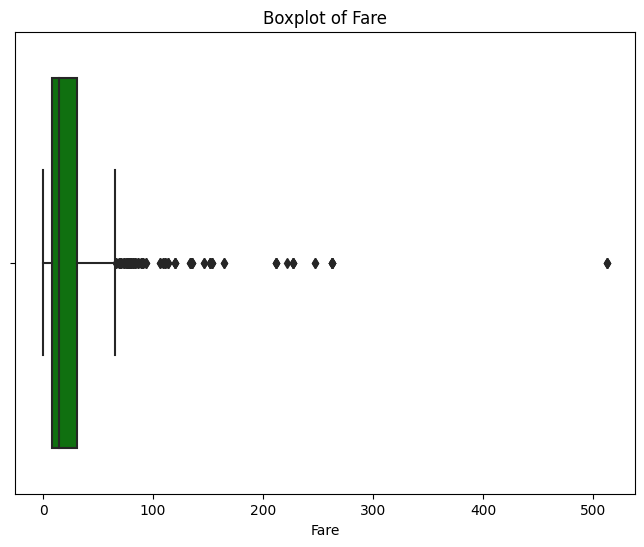

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_Selected['Fare'], color='green')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

In [20]:
Q1 = df_Selected['Fare'].quantile(0.25)
Q3 = df_Selected['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
df_Selected['Fare'] = df_Selected['Fare'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [23]:
X = df_Selected.drop("Survived",axis=1)
y = df_Selected["Survived"]

In [24]:
outliers_capped = df_Selected[(df_Selected['Fare'] < lower_bound) | (df_Selected['Fare'] > upper_bound)]
print(f"Number of outliers after capping: {outliers_capped.shape[0]}")

Number of outliers after capping: 0


In [25]:
df_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,65.6344
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,3,1,30.626179,1,2,23.4500
889,1,0,26.000000,0,0,30.0000


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8212290502793296


In [31]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_clf.predict(X_val)

In [33]:
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8603351955307262


In [34]:
importances = rf_clf.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

In [35]:
print(feature_importance)

  Feature  Importance
2     Age    0.323262
1     Sex    0.259180
5    Fare    0.240445
0  Pclass    0.088760
3   SibSp    0.050231
4   Parch    0.038121


In [36]:
dtree = DecisionTreeClassifier(random_state=42)

In [37]:
bagging_model = BaggingClassifier(base_estimator=dtree, n_estimators=100, random_state=42)

In [38]:
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [39]:
y_pred = bagging_model.predict(X_val)

In [40]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of Bagging with Decision Tree: {accuracy:.4f}")

Accuracy of Bagging with Decision Tree: 0.8603
